# Exploration NBA Dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
nba = pd.read_csv('all_seasons.csv').drop('Unnamed: 0', axis = 1)
nba.shape

(11145, 21)

In [3]:
nba.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [4]:
pd.DataFrame({'dataFeatures' : nba.columns, 'dataType' : nba.dtypes.values, 
              'null' : [nba[i].isna().sum() for i in nba.columns],
              'nullPct' : [((nba[i].isna().sum()/len(nba[i]))*100).round(2) for i in nba.columns],
             'Nunique' : [nba[i].nunique() for i in nba.columns],
             'uniqueSample' : [list(pd.Series(nba[i].unique()).sample(2)) for i in nba.columns]}).reset_index(drop = True)

,dataFeatures,dataType,null,nullPct,Nunique,uniqueSample
0,player_name,object,0,0.0,2235,"[Marcus Georges-Hunt, Bruno Caboclo]"
1,team_abbreviation,object,0,0.0,36,"[MIN, ORL]"
2,age,float64,0,0.0,27,"[26.0, 34.0]"
3,player_height,float64,0,0.0,30,"[215.9, 210.82]"
4,player_weight,float64,0,0.0,157,"[101.604608, 63.956472]"
5,college,object,0,0.0,316,"[Oklahoma State, Kansas State]"
6,country,object,0,0.0,76,"[Slovenia, England]"
7,draft_year,object,0,0.0,45,"[2011, 1987]"
8,draft_round,object,0,0.0,8,"[1, Undrafted]"
9,draft_number,object,0,0.0,75,"[Undrafted, 33]"


Dataset ini diambil dari tahun 1996 sampai 2020, namun untuk season 2019-2020 belum selesai. Seharusnya sudah selesai, tapi seperti yang Wikipedia katakan:

> The 2019–20 NBA season is the 74th season of the National Basketball Association (NBA). The regular season began on October 22, 2019 and was originally supposed to end on April 15, 2020. However, the season was suspended on March 11, 2020 as a result of the COVID-19 pandemic.[1] 

[1] "NBA to suspend season following Wednesday's games". NBA.com. March 11, 2020. Retrieved March 12, 2020. https://www.nba.com/article/2020/03/11/nba-suspend-season-following-wednesdays-games

In [5]:
nba['season'].unique()

array(['1996-97', '1997-98', '1998-99', '1999-00', '2000-01', '2001-02',
       '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08',
       '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14',
       '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20'],
      dtype=object)

# Exploration

## AVG PPG

10 pemain teratas dengan avg ppg terbanyak

In [6]:
nba.sort_values('pts', ascending = False).head(10)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
10219,James Harden,HOU,29.0,195.58,99.79024,Arizona State,USA,2009,1,3,...,36.1,6.6,7.5,6.3,0.023,0.157,0.396,0.616,0.394,2018-19
4083,Kobe Bryant,LAL,27.0,198.12,99.79024,None,USA,1996,1,13,...,35.4,5.3,4.5,4.7,0.026,0.127,0.384,0.559,0.228,2005-06
10746,James Harden,HOU,30.0,195.58,99.79024,Arizona State,USA,2009,1,3,...,34.5,6.4,7.4,6.2,0.026,0.132,0.358,0.616,0.355,2019-20
4271,Allen Iverson,PHI,31.0,182.88,74.84268,Georgetown,USA,1996,1,1,...,33.0,3.2,7.4,0.8,0.016,0.071,0.354,0.543,0.331,2005-06
2953,Tracy McGrady,ORL,24.0,203.20,95.25432,None,USA,1997,1,9,...,32.1,6.5,5.5,3.5,0.046,0.147,0.350,0.564,0.282,2002-03
7972,Kevin Durant,OKC,25.0,205.74,108.86208,Texas,USA,2007,1,2,...,32.0,7.4,5.5,8.0,0.022,0.184,0.327,0.635,0.259,2013-14
4825,Kobe Bryant,LAL,28.0,198.12,99.79024,None,USA,1996,1,13,...,31.6,5.7,5.4,0.6,0.028,0.132,0.333,0.580,0.249,2006-07
9304,Russell Westbrook,OKC,28.0,190.50,90.71840,UCLA,USA,2008,1,4,...,31.6,10.7,10.4,3.3,0.053,0.279,0.408,0.554,0.543,2016-17
4075,LeBron James,CLE,21.0,203.20,108.86208,None,USA,2003,1,1,...,31.4,7.0,6.6,4.2,0.026,0.171,0.336,0.568,0.315,2005-06
2490,Allen Iverson,PHI,27.0,182.88,74.84268,Georgetown,USA,1996,1,1,...,31.4,4.5,5.5,5.1,0.019,0.093,0.371,0.489,0.266,2001-02


Nama-nama yang familiar, mengingat kebanyakan pemain-pemain di atas sering lead scoring hampir setiap game. Terutama James Harden yang mendapatkan MVP pada tahun 2018. Dan ini dibenarkan oleh Wikipedia :

> In 2018, Harden led the league in scoring and was named the NBA Most Valuable Player.

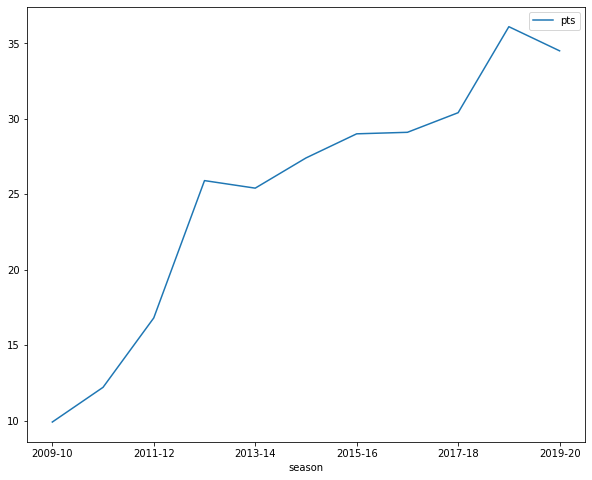

In [7]:
nba[nba['player_name'] == 'James Harden'][['pts','season']].set_index('season').plot(figsize = (10, 8))

Dikarenakan dataset ini dibuat saat season 2019-2020 dimulai, itu kenapa kita belum dapat memastikan bahwa avg ppg-nya akan menurun atau tidak. Tapi memang, terlihat fungsinya eksponensial. Saya sedikit penasaran dengan Kobe Bryant, dimana menurut saya dia orang yang paling konsisten dalam mencetak point. 

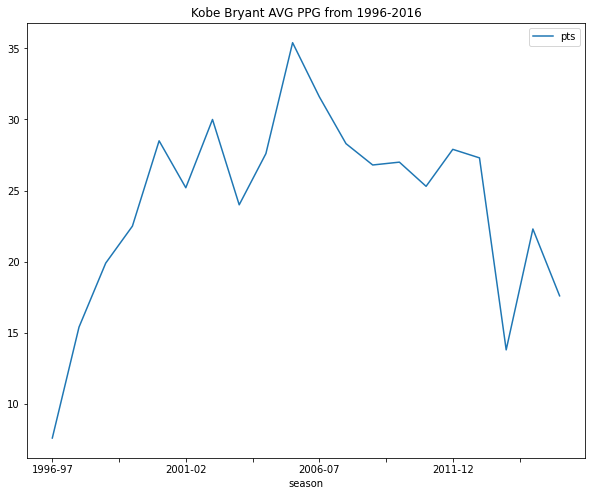

In [8]:
nba[nba['player_name'] == 'Kobe Bryant'][['pts','season']].set_index('season').plot(figsize = (10, 8),
                                                                                   title = 'Kobe Bryant AVG PPG from 1996-2016')

Ternyata di season 2005-06 adalah season dimana Kobe punya AVG PPG terbanyak untuk dataset ini. Dan adanya fakta menarik pada season 2005-06, tepatnya tanggal 22 Jan 2006, Kobe mencetak 81 poin! Dan itu menjadi skor terbanyak ke-dua sepanjang sejarah yang pemain dapat lakukan di satu game NBA. Dan banyak fakta-fakta menariknya yang terjadi pada season 2005-2006 di website ini: http://global.nba.com/news/10-years-later-10-facts-about-kobes-2005-06-season/. 

<i>Well, Legends Never Die</i>

## AVG APG

In [9]:
nba.sort_values('ast', ascending = False).head(10)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
6817,Rajon Rondo,BOS,26.0,185.42,84.368112,Kentucky,USA,2006,1,21,...,11.9,4.8,11.7,5.2,0.039,0.111,0.203,0.483,0.498,2011-12
8662,Rajon Rondo,SAC,30.0,185.42,84.368112,Kentucky,USA,2006,1,21,...,11.9,6.0,11.7,-3.4,0.033,0.150,0.187,0.506,0.473,2015-16
5056,Chris Paul,NOH,23.0,182.88,79.378600,Wake Forest,USA,2005,1,4,...,21.1,4.0,11.6,7.9,0.024,0.103,0.254,0.576,0.500,2007-08
4759,Steve Nash,PHX,33.0,190.50,88.450440,Santa Clara,Canada,1996,1,15,...,18.6,3.5,11.6,11.5,0.014,0.096,0.228,0.654,0.468,2006-07
3647,Steve Nash,PHX,31.0,190.50,88.450440,Santa Clara,Canada,1996,1,15,...,15.5,3.3,11.5,13.3,0.025,0.078,0.205,0.606,0.460,2004-05
430,Mark Jackson,IND,32.0,190.50,83.914520,St. John's (NY),USA,1987,1,18,...,9.9,4.8,11.4,-2.0,0.035,0.116,0.155,0.525,0.464,1996-97
6555,Steve Nash,PHX,37.0,190.50,80.739376,Santa Clara,Canada,1996,1,15,...,14.7,3.5,11.4,4.5,0.019,0.099,0.212,0.601,0.498,2010-11
9249,James Harden,HOU,27.0,195.58,99.790240,Arizona State,USA,2009,1,3,...,29.1,8.1,11.2,6.3,0.035,0.212,0.341,0.613,0.505,2016-17
6644,Rajon Rondo,BOS,25.0,185.42,77.564232,Kentucky,USA,2006,1,21,...,10.6,4.4,11.2,8.9,0.045,0.096,0.181,0.495,0.448,2010-11
5232,Steve Nash,PHX,34.0,190.50,80.739376,Santa Clara,Canada,1996,1,15,...,16.9,3.5,11.1,10.3,0.013,0.096,0.218,0.641,0.447,2007-08


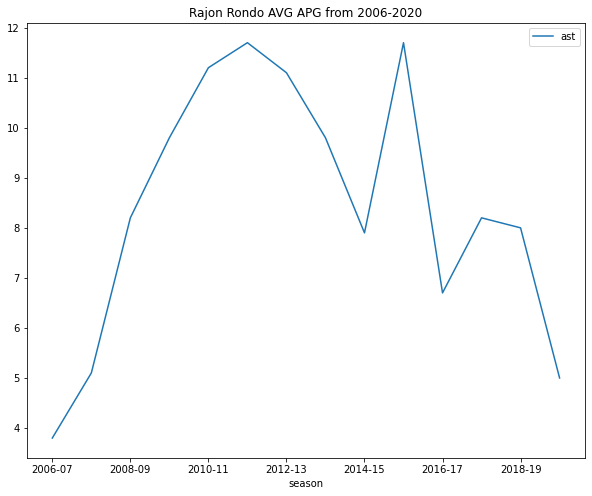

In [10]:
nba[nba['player_name'] == 'Rajon Rondo'][['ast','season']].set_index('season').plot(figsize = (10, 8),
                                                                                   title = 'Rajon Rondo AVG APG from 2006-2020')

Memang ada penurunan di season-season sekarang, tapi pertanyaan terpentingnya, apakah Rondo telah melewati masa primenya?

## AVG RPG

In [11]:
nba.sort_values('reb', ascending = False).head(10)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
1943,Danny Fortson,GSW,25.0,203.20,117.933920,Cincinnati,USA,1997,1,10,...,16.7,16.3,0.8,-9.6,0.152,0.371,0.166,0.678,0.042,2000-01
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
9666,Andre Drummond,DET,24.0,210.82,126.552168,Connecticut,USA,2012,1,9,...,15.0,16.0,3.0,-1.0,0.145,0.329,0.207,0.555,0.140,2017-18
10272,Andre Drummond,DET,25.0,210.82,126.552168,Connecticut,USA,2012,1,9,...,17.3,15.6,1.4,3.3,0.151,0.311,0.226,0.555,0.068,2018-19
2735,Ben Wallace,DET,28.0,205.74,108.862080,Virginia Union,USA,Undrafted,Undrafted,Undrafted,...,6.9,15.4,1.6,5.0,0.120,0.345,0.103,0.486,0.069,2002-03
10808,Andre Drummond,CLE,26.0,208.28,126.552168,Connecticut,USA,2012,1,9,...,17.5,15.3,2.7,-5.5,0.130,0.339,0.252,0.549,0.135,2019-20
9687,DeAndre Jordan,LAC,29.0,210.82,120.201880,Texas A&M,USA,2008,2,35,...,12.0,15.2,1.5,-2.4,0.132,0.339,0.151,0.648,0.074,2017-18
6255,Kevin Love,MIN,22.0,208.28,117.933920,UCLA,USA,2008,1,5,...,20.2,15.2,2.5,-6.0,0.136,0.336,0.227,0.593,0.116,2010-11
8135,DeAndre Jordan,LAC,26.0,210.82,120.201880,Texas A&M,USA,2008,2,35,...,11.5,15.0,0.7,11.2,0.162,0.323,0.135,0.638,0.030,2014-15
713,Dennis Rodman,CHI,37.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,4.7,15.0,2.9,6.7,0.169,0.319,0.088,0.459,0.112,1997-98


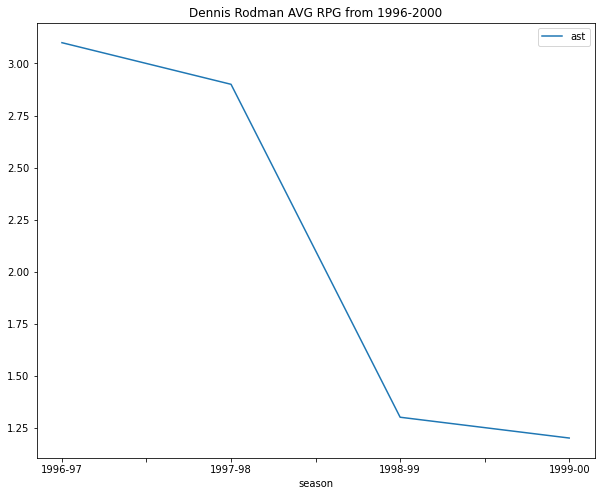

In [12]:
nba[nba['player_name'] == 'Dennis Rodman'][['ast','season']].set_index('season').plot(figsize = (10, 8),
                                                                                     title = 'Dennis Rodman AVG RPG from 1996-2000')

Menurut saya, grafik di atas kurang merepresentasikan Dennis Rodman sebagai pemain. Dimana dia pemain yang di draft di tahun 1980-an. Namun buat yang mengikuti basket, pasti pernah mendengar bahwa film anime yang berjudul 'Slam Dunk' dimana tokoh utamanya Hanamichi Sakuragi terinspirasi dari Dennis Rodman. Beberapa orang menjuluki Rodman sebagai Rebounding King. Jadi tidak heran, kalau dia masuk ke daftar 10 pemain NBA dengan AVG RPG yang banyak. 

https://slamdunk.fandom.com/wiki/Hanamichi_Sakuragi

Saya penasaran, siapa pemain-pemain NBA yang tidak pernah kuliah tapi menjadi first draft. Yang saya tau, Lebron james. Tapi coba kita lihat siapa lagi yang lainnya. 

In [13]:
nba[(nba['college'] == 'None') & (nba['draft_number'] == '1')]['player_name'].unique()

array(['Kwame Brown', 'Yao Ming', 'LeBron James', 'Dwight Howard',
       'Andrea Bargnani'], dtype=object)

Saya baru tau, Yao Ming dan Dwight Howard langsung masuk NBA tanpa kuliah sebelumnya. Sebentar, saya jadi penasaran lagi, ada tidak orang yang mendapatkan triple-double, meski memang hanya secara rata-rata. 

In [14]:
nba[(nba['pts'] >= 10) & (nba['reb'] >= 10) & (nba['ast'] >= 10)]

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
9304,Russell Westbrook,OKC,28.0,190.5,90.7184,UCLA,USA,2008,1,4,...,31.6,10.7,10.4,3.3,0.053,0.279,0.408,0.554,0.543,2016-17
9777,Russell Westbrook,OKC,29.0,190.5,90.7184,UCLA,USA,2008,1,4,...,25.4,10.1,10.3,6.6,0.048,0.226,0.326,0.524,0.464,2017-18
10375,Russell Westbrook,OKC,30.0,190.5,90.7184,UCLA,USA,2008,1,4,...,22.9,11.1,10.7,5.0,0.036,0.255,0.301,0.501,0.440,2018-19


Russell Westbrook! Sangat tidak mengherankan, mengingat Russell Westbrook salah satu pemain yang seringkali mendapatkan triple-double di setiap game. Dia juga termasuk 10 pemain yang paling sering mendapatkan triple-double. 

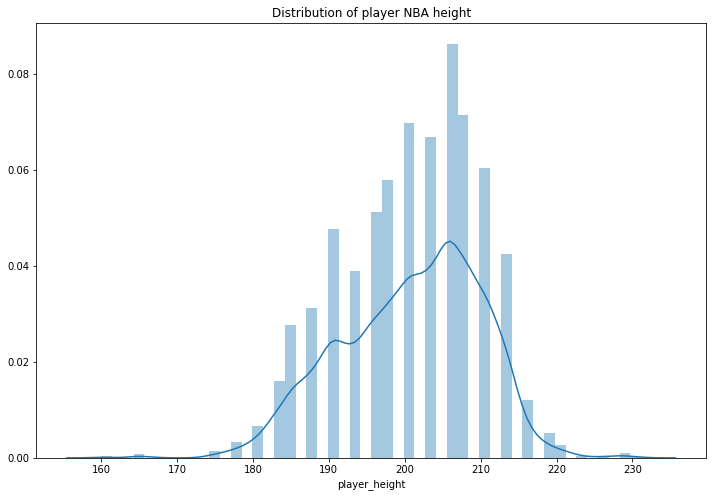

In [15]:
plt.figure(figsize = (12, 8))
plt.title('Distribution of player NBA height')
sns.distplot(nba['player_height'])

Menarik, melihat ada pemain-pemain NBA yang tingginya di bawah 170 cm. Ini membuat saya penasaran, siapa-siapa saja pemain-pemain NBA yang punya tinggi di bawah 170. Setau saya, Muggsy Bogues dan dia bisa ngedunk! Tapi mari kita lihat siapa yang lainnya. 

In [16]:
nba[nba['player_height'] <= 170]['player_name'].unique()

array(['Muggsy Bogues', 'Spud Webb', 'Earl Boykins'], dtype=object)

Hanya 3 pemain, bisa dibayangkan betapa sulitnya untuk masuk NBA jika kita hanya mempunyai tinggi 170 cm atau kurang dari 170 cm. Mari kita coba lihat, bagaimana dengan korelasi feature pts, ast, rebound, tinggi pemain, berat badan pemain.

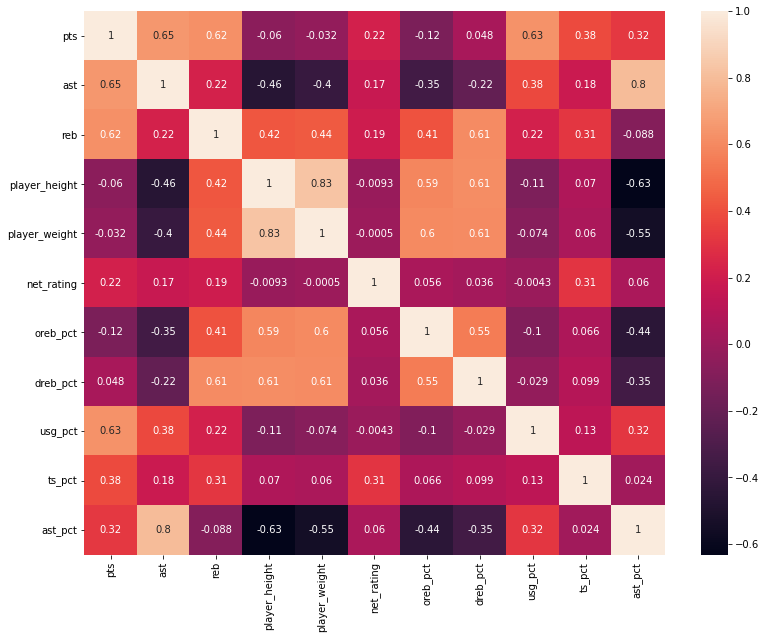

In [17]:
plt.figure(figsize = (13, 10))
sns.heatmap(nba[['pts','ast','reb','player_height','player_weight','net_rating', 'oreb_pct',
                'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']].corr(), annot = True)

Dari sini kita bisa menarik kesimpulan, bahwa banyak fitur yang saling berkorelasi kuat. Misalnya fitur reb dengan 'dreb_pct' dan 'oreb_pct', yang dimana 'dreb' artinya Defensive Rebound dan 'oreb' artinya Offensive Rebound. Jadi kita tidak perlu memasukkan semua fitur itu ke dalam model kita, cukup satu saja. Dan juga fitur-fitur lainnya, seperti ast_pct dan ast.

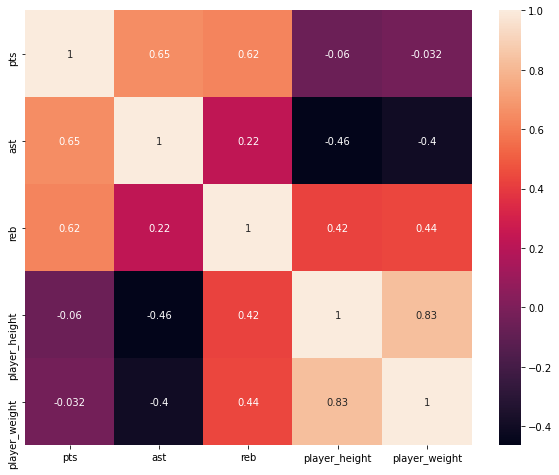

In [18]:
plt.figure(figsize = (10, 8))
sns.heatmap(nba[['pts','ast','reb','player_height','player_weight']].corr(), annot = True)

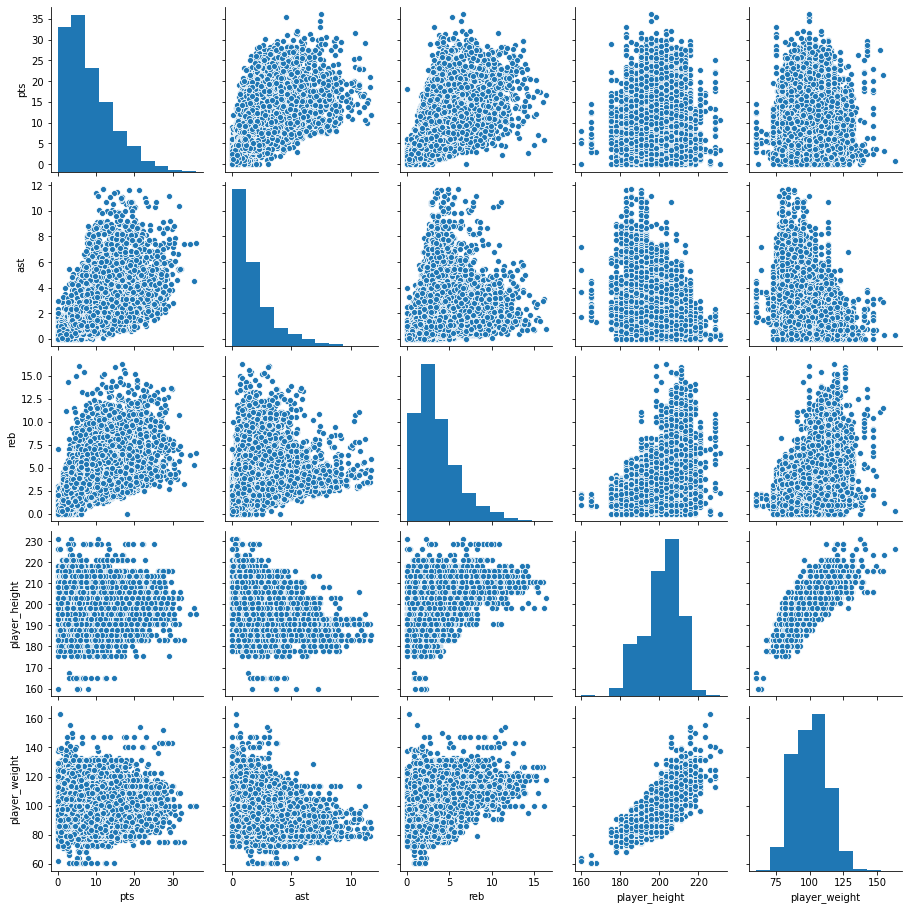

In [19]:
sns.pairplot(nba[['pts','ast','reb','player_height','player_weight']])

Masuk akal, melihat korelasi minus antara fitur tinggi dan berat pemain dengan assist. Memang tidak menutup kemungkinan adanya pemain besar dengan court vision dan pass yang baik, misalnya Nikola Jokić.

# Rookie of the Year?

Ini adalah perbincangan menarik, mengingat di setiap perbincangan basket, ini hanya antara Zion Williamson atau Ja Morant. Tapi mengapa kita tidak lihat bagaimana data mengatakannya. 

In [35]:
nba[nba['draft_year'] == '2019'].sort_values('pts', ascending = False).head(3)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
10979,Zion Williamson,NOP,19.0,198.12,128.820128,Duke,USA,2019,1,1,...,23.6,6.8,2.2,9.6,0.096,0.113,0.285,0.623,0.116,2019-20
10731,Ja Morant,MEM,20.0,190.50,78.925008,Murray State,USA,2019,1,2,...,17.6,3.5,7.0,-0.5,0.024,0.082,0.257,0.569,0.349,2019-20
10937,RJ Barrett,NYK,19.0,198.12,97.068688,Duke,Canada,2019,1,3,...,14.1,5.0,2.6,-9.2,0.027,0.134,0.232,0.476,0.128,2019-20


In [36]:
nba[nba['draft_year'] == '2019'].sort_values('ast', ascending = False).head(3)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
10731,Ja Morant,MEM,20.0,190.50,78.925008,Murray State,USA,2019,1,2,...,17.6,3.5,7.0,-0.5,0.024,0.082,0.257,0.569,0.349,2019-20
10824,Darius Garland,CLE,20.0,185.42,87.089664,Vanderbilt,USA,2019,1,5,...,12.3,1.9,3.9,-8.7,0.014,0.046,0.201,0.498,0.182,2019-20
11081,Luka Samanic,SAS,20.0,208.28,102.965384,None,Croatia,2019,1,19,...,0.0,2.0,3.0,26.9,0.000,0.133,0.154,0.000,0.333,2019-20


In [37]:
nba[nba['draft_year'] == '2019'].sort_values('reb', ascending = False).head(3)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
10979,Zion Williamson,NOP,19.0,198.12,128.820128,Duke,USA,2019,1,1,...,23.6,6.8,2.2,9.6,0.096,0.113,0.285,0.623,0.116,2019-20
10892,Rui Hachimura,WAS,22.0,203.20,104.326160,Gonzaga,Japan,2019,1,9,...,13.7,6.0,1.7,-7.7,0.052,0.157,0.190,0.548,0.081,2019-20
10767,Brandon Clarke,MEM,23.0,203.20,97.522280,Gonzaga,Canada,2019,1,21,...,12.0,5.8,1.4,1.1,0.069,0.177,0.183,0.670,0.097,2019-20


Bagaimana kalau kita lihat Luka Doncic, sebagai Rookie Of The Year di season 2018-2019

In [42]:
nba[(nba['player_name'] == 'Luka Doncic')] 

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
10592,Luka Doncic,DAL,20.0,200.66,98.883056,None,Slovenia,2018,1,3,...,21.2,7.8,6.0,-3.1,0.036,0.198,0.296,0.545,0.317,2018-19
11080,Luka Doncic,DAL,21.0,200.66,104.326160,None,Slovenia,2018,1,3,...,28.4,9.4,8.7,6.8,0.038,0.223,0.358,0.583,0.451,2019-20


Dengan melihat statistik Luka Doncic, saya masih menganggap kalau keduanya (Ja Morant dan Zion Williamson) punya peluang yang sama baiknya. 

# Unsupervised Learning

Data yang akan digunakan hanyalah data-data numerik yang sudah di eksplorasi sebelumnya. Karena menurut saya. fitur-fitur yang saya eksplorasi sebelumnya, adalah fitur-fitur yang mempengerahui posisi seseorang. 

In [21]:
features = ['ast','pts', 'reb', 'player_weight', 'player_height']
X = nba[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
pca = PCA(2) # buat dua dimensi saja
dfpca = pd.DataFrame(pca.fit_transform(X_scaled), columns = ['PC1','PC2'])

In [23]:
pca.explained_variance_ratio_

array([0.4637482 , 0.40316054])

Lumayan, informasi yang tersisa masih sekitar 86%. Dan pada project ini, saya tidak perlu menggunakan <b>Elbow Methods</b> atau melihat <b>Silhouette Score</b> dalam menentukan <b>K</b>. Mengingat di project ini, saya ingin cluster pemain-pemain berdasarkan posisinya. Dimana dalam basket terdapat 5 posisi, yaitu <b>PG (Point Guard), SG (Shooting Guard), SF (Small Forward), PF (Power Forward)</b>, dan <b>C (Center).</b> 

In [24]:
kmeans = KMeans(5, random_state = 101)
kmeans.fit(dfpca)
labels = kmeans.labels_

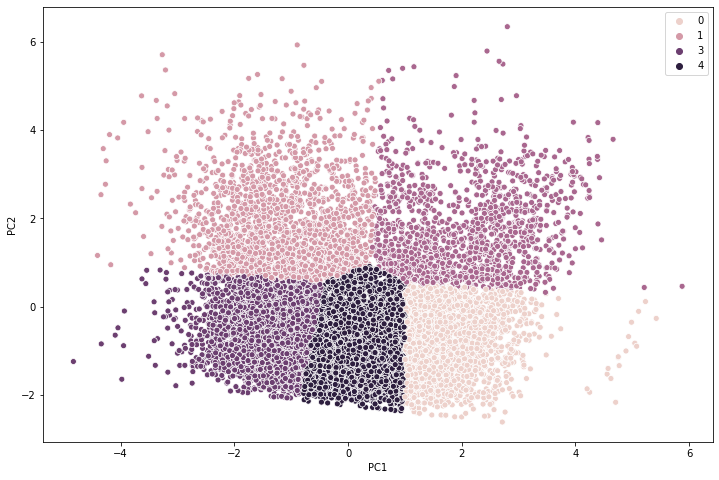

In [25]:
plt.figure(figsize = (12, 8))
sns.scatterplot(dfpca['PC1'], dfpca['PC2'], hue = labels, cmap = 'rainbow')

Dalam unsupervised learning, mau tidak mau kitalah sendiri yang memahami setiap label yang diberikan oleh mesin. Tapi mari kita coba untuk melakukannya berdasarkan pemain-pemain yang saya tau posisinya. 

In [26]:
LBJ = pca.transform(scaler.transform(nba[nba['player_name'] == 'LeBron James'][features]))
kmeans.predict(LBJ)

array([1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2], dtype=int32)

LeBron punya posisi-posisi yang berganti-ganti tiap season. Tapi mari kita eksplorasi lagi lainnya. 

In [27]:
RW = pca.transform(scaler.transform(nba[nba['player_name'] == 'Russell Westbrook'][features]))
kmeans.predict(RW)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [28]:
YM = pca.transform(scaler.transform(nba[nba['player_name'] == 'Yao Ming'][features]))
kmeans.predict(YM)

array([1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Jelas rasanya, jika saya bilang cluster 1 adalah posisi-posisi untuk Center. Maka dari hasil LBJ, saya juga bisa berpendapat, bahwa 2 adalah Small Forward (Atau bisa juga Power Forward). Tapi mari kita beranggapan bahwa cluster 2 adalah Small Forward. 

In [29]:
MB = pca.transform(scaler.transform(nba[nba['player_name'] == 'Muggsy Bogues'][features]))
kmeans.predict(MB)

array([2, 0, 0, 0, 0], dtype=int32)

Saya pikir, Cluster 0 menunjukkan posisi-posisi untuk Point Guard.

In [30]:
RA = pca.transform(scaler.transform(nba[nba['player_name'] == 'Ray Allen'][features]))
kmeans.predict(RA)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4], dtype=int32)

Dari sini, saya bisa ambil kesimpulan bahwa Cluster 4 adalah Shooting Guard. Karena seingat saya, di akhir-akhir karir Ray Allen dia diposisikan sebagai Shooting Guard di Miami Heat. Meski memang, sebetulnya saat dia di Boston, dia juga sudah diposisikan sebagai Shooting Guard. Tapi memang dikarenakan fitur yang digunakan adalah hanya pts. Tidak dipisahkan, mana yang pts berasal dari garis 3 poin atau tidak. 

# Conclusion

Kalau saya coba tarik kesimpulannya:
* Cluster 0: Posisi Point Guard
* Cluster 1: Posisi Center
* Cluster 2: Posisi Small Forward
* Cluster 3: Posisi Power Forward 
* Cluster 4: Posisi Shooting Guard

> Namun adanya kekurangan dari model di atas, mengingat fitur-fitur pada dataset ini tidak terlalu memumpuni. Mengingat kalau misalnya, kita ingin membedakan posisi Shooting Guard dan Small Forward, fisik dan AVG PTS tidak bisa jadi pegangan. Seharusnya ada fitur yang membedakan mana poin dari garis 3 poin dan mana yang di dalam garis 3 poin. 